# <f2>1. Importing the libraries

In [72]:
import pandas as pd
import seaborn as sns

#  <f2>2. Importing the Dataset

In [73]:
data=pd.read_csv("heart.csv")

# <f2>3. Take Care Of Missing Values

In [74]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# <f2>4. Take Care of Duplicate Values

In [75]:
data_dup=data.duplicated().any()
data_dup

True

In [76]:
data=data.drop_duplicates()

In [77]:
data_dup=data.duplicated().any()
data_dup

False

<h3> Let us Understand our Column Better

In [78]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### Checking correlation between columns

In [79]:
print(data.corr()["target"].abs().sort_values(ascending=False))
#in this we can see that fbs is weakly correlated with target values

target      1.000000
exang       0.435601
cp          0.432080
oldpeak     0.429146
thalach     0.419955
ca          0.408992
slope       0.343940
thal        0.343101
sex         0.283609
age         0.221476
trestbps    0.146269
restecg     0.134874
chol        0.081437
fbs         0.026826
Name: target, dtype: float64


### First, analysing the target variable

In [80]:
target_temp = data.target.value_counts()

print(target_temp)

target
1    164
0    138
Name: count, dtype: int64


### Analysing the 'sex' feature

<Axes: xlabel='sex', ylabel='target'>

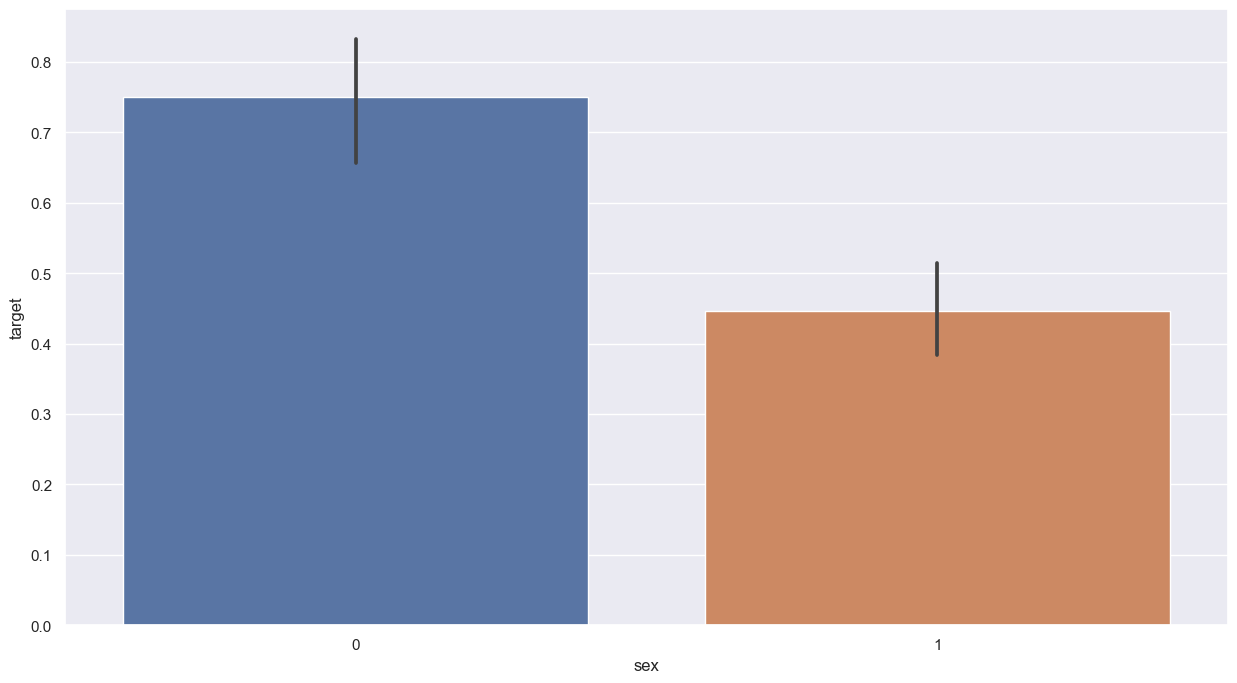

In [81]:
sns.barplot(x=data["sex"],y=data['target'])

### Analysing the 'Chest Pain Type' feature

<Axes: xlabel='cp', ylabel='target'>

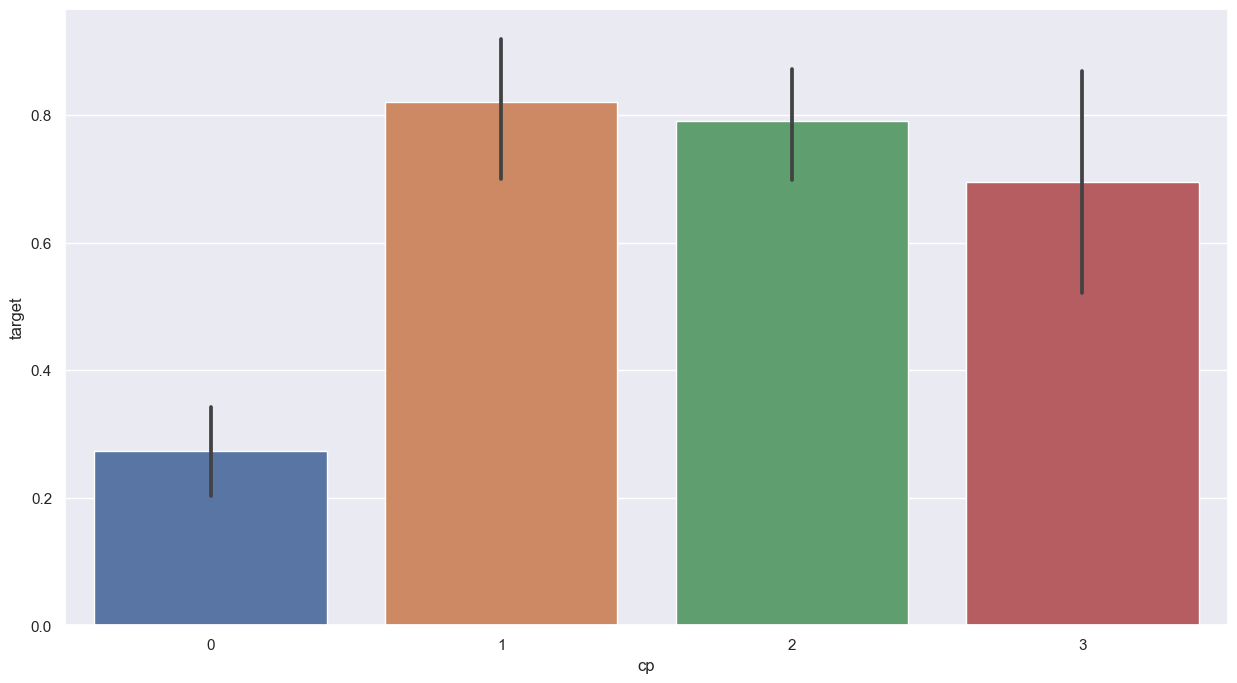

In [82]:
sns.barplot(x=data['cp'],y=data['target'])

### Analysing the 'fbs' feature

<Axes: xlabel='fbs', ylabel='target'>

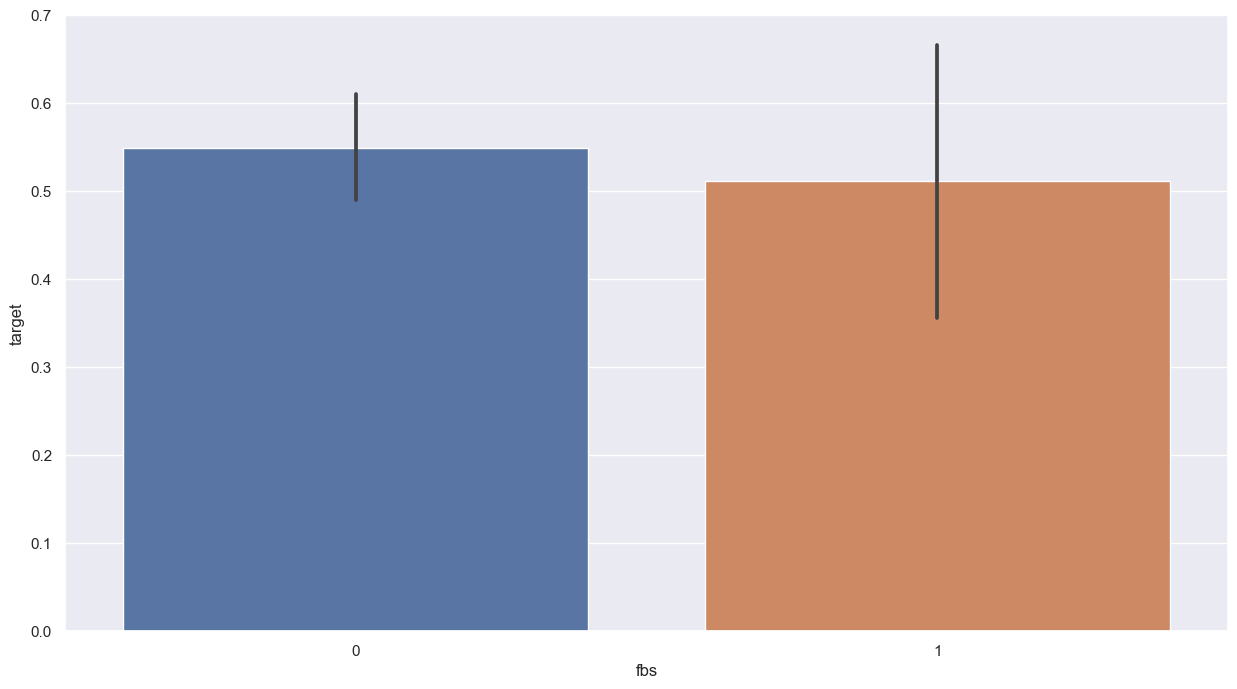

In [83]:
sns.barplot(x=data["fbs"],y=data['target'])

### Analysing the 'exang' feature

<Axes: xlabel='exang', ylabel='target'>

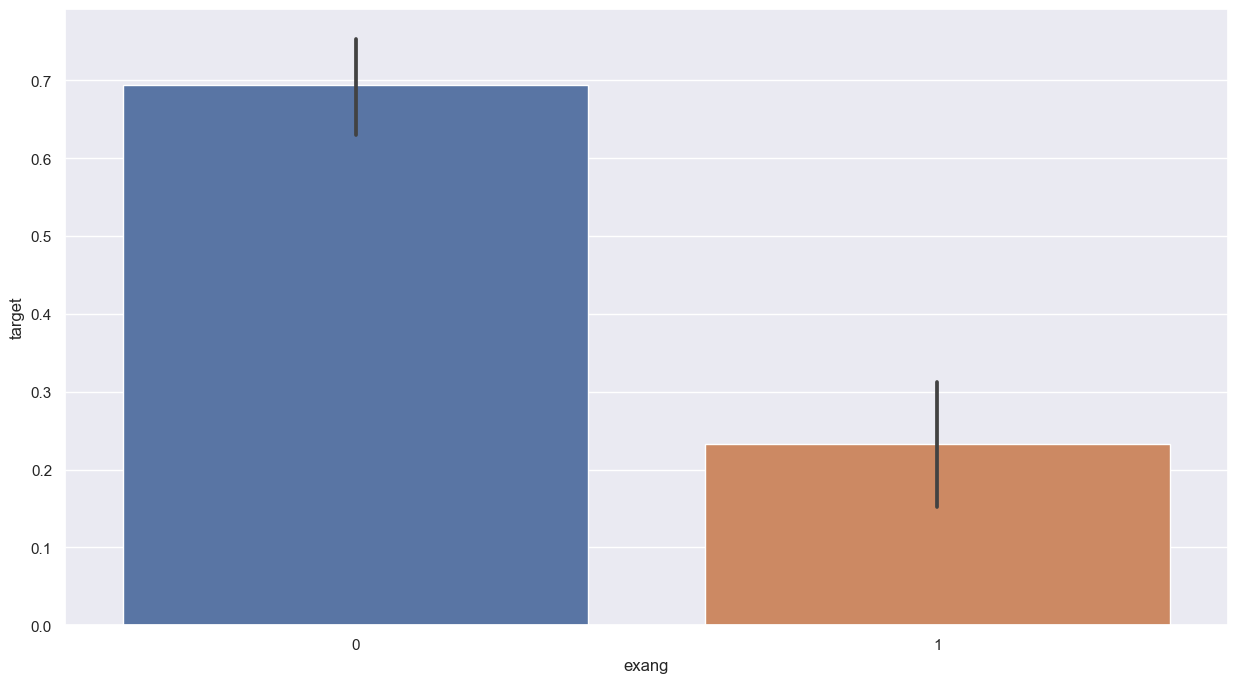

In [84]:
sns.barplot(x=data["exang"],y=data['target'])

### Analysing the 'restecg' feature

<Axes: xlabel='restecg', ylabel='target'>

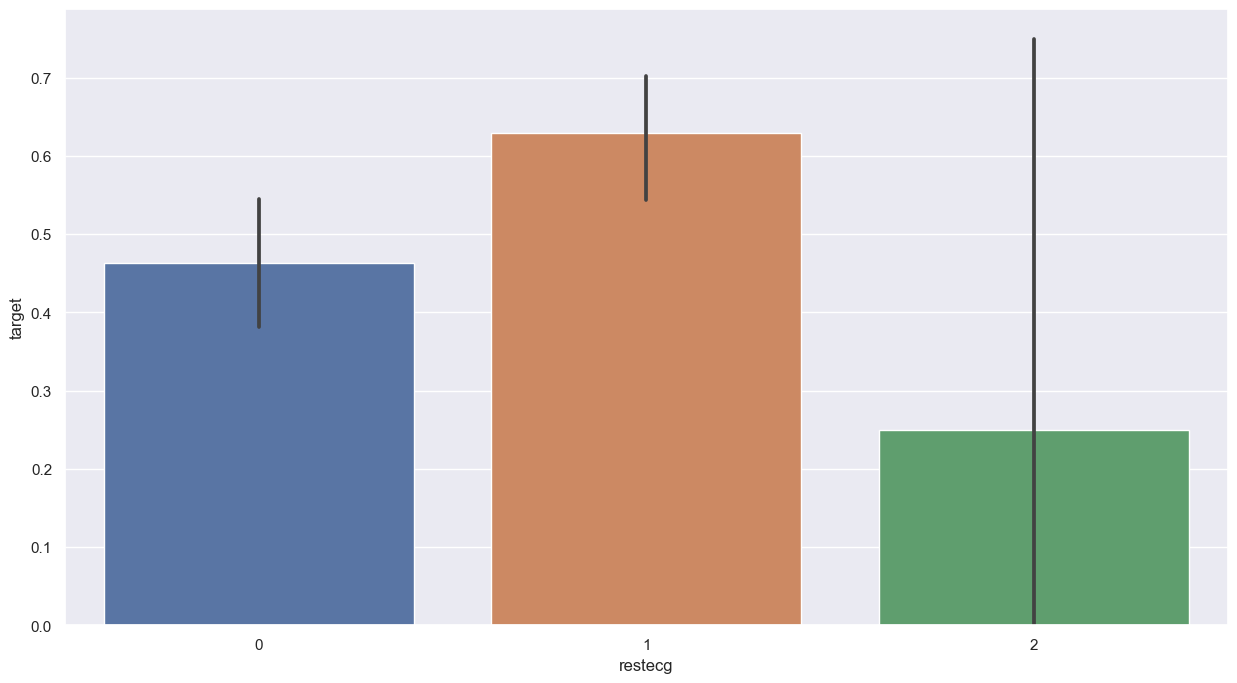

In [85]:
sns.barplot(x=data["restecg"],y=data['target'])

### Analysing the 'Slope' feature

<Axes: xlabel='slope', ylabel='target'>

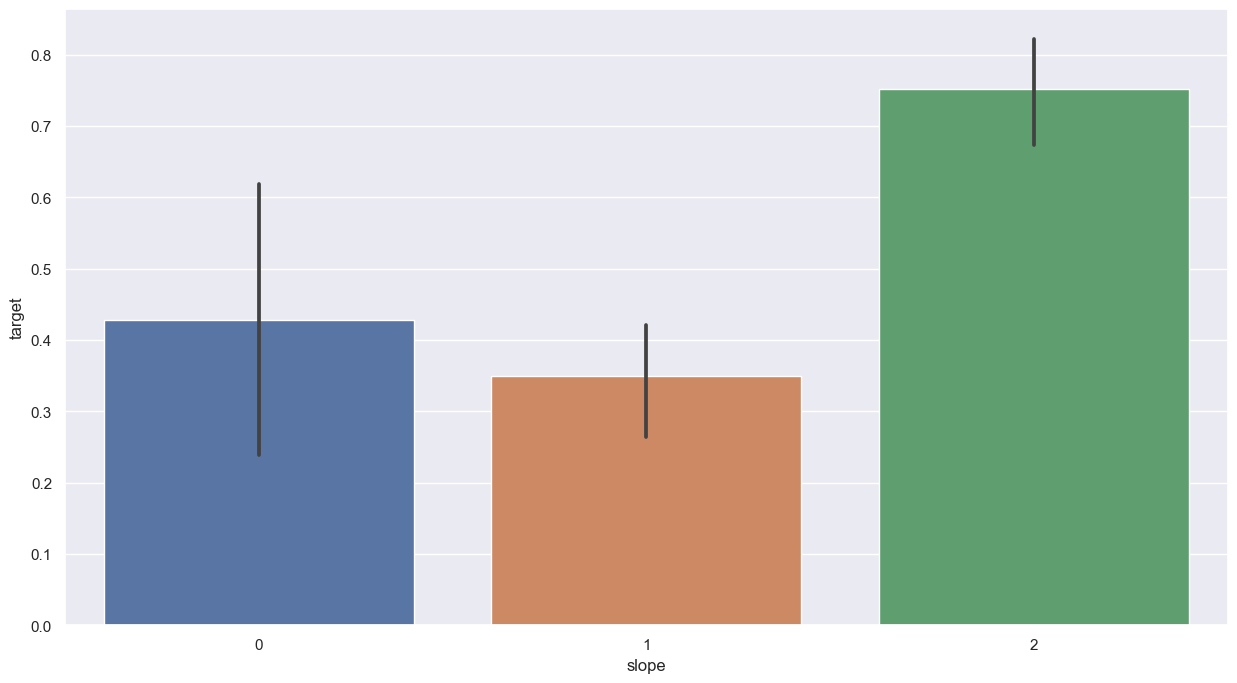

In [86]:
sns.barplot(x=data["slope"],y=data['target'])

### Analysing the 'ca' feature

<Axes: xlabel='ca', ylabel='count'>

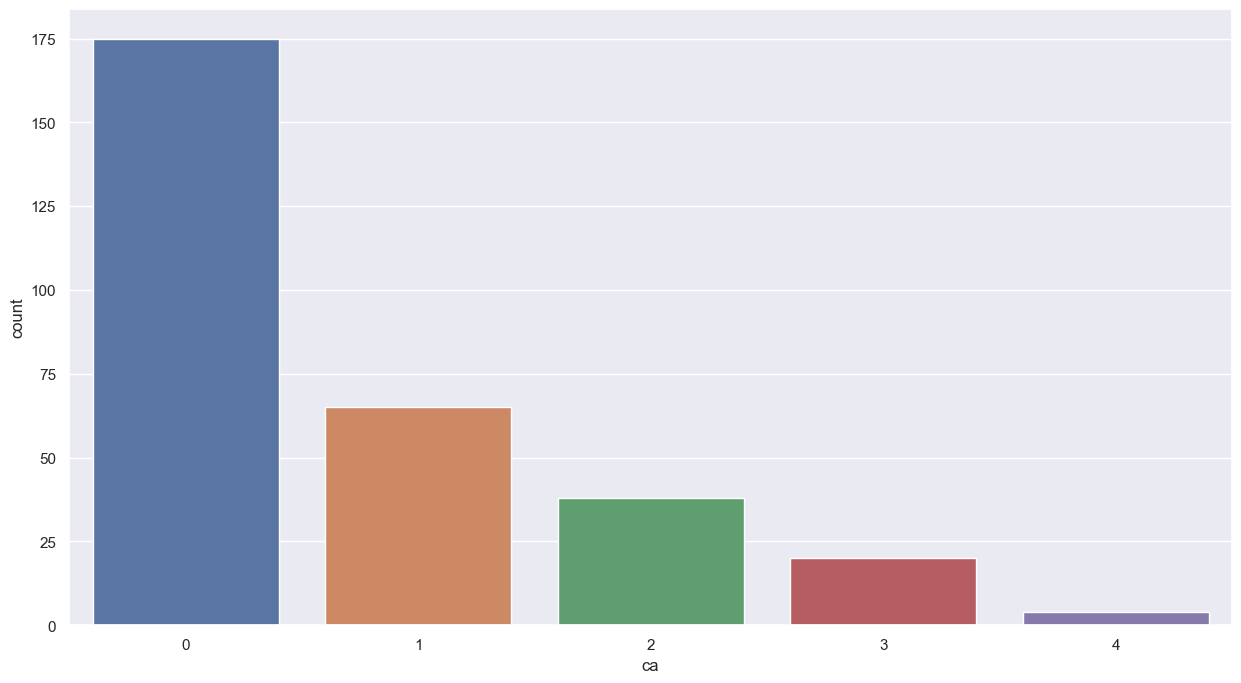

In [87]:
sns.countplot(x=data["ca"])

<Axes: xlabel='ca', ylabel='target'>

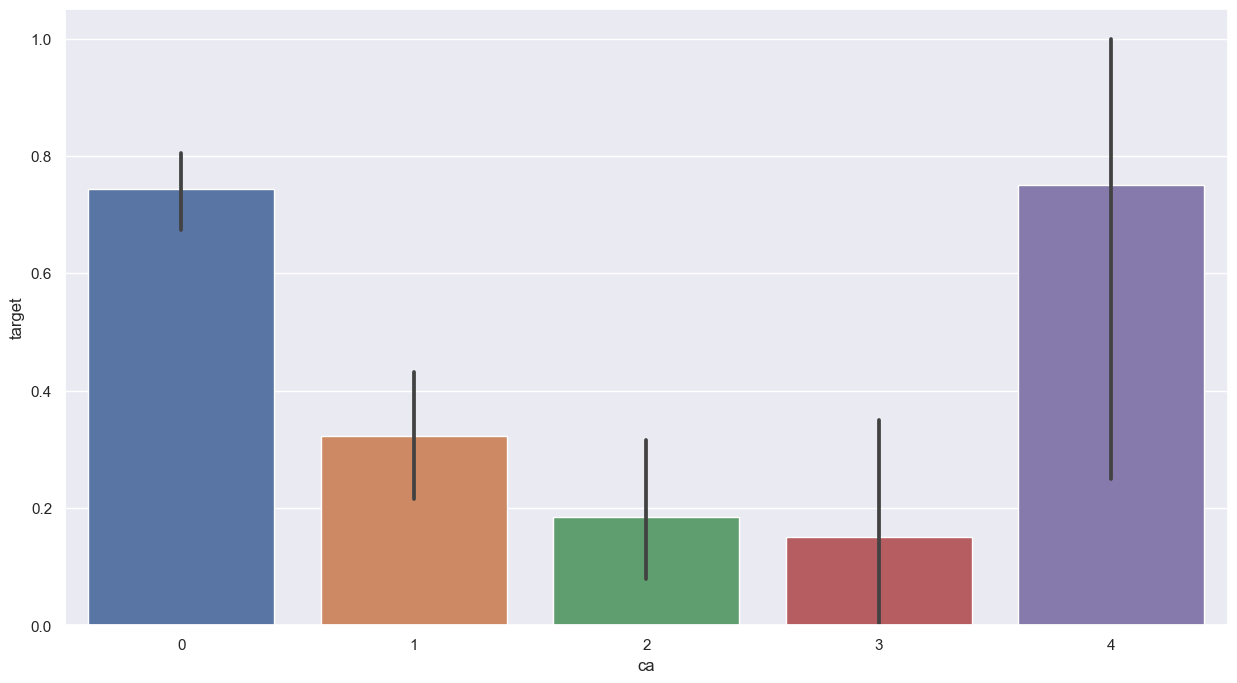

In [88]:
sns.barplot(x=data["ca"],y=data['target'])

### Analysing the 'thal' feature

<Axes: xlabel='thal', ylabel='target'>

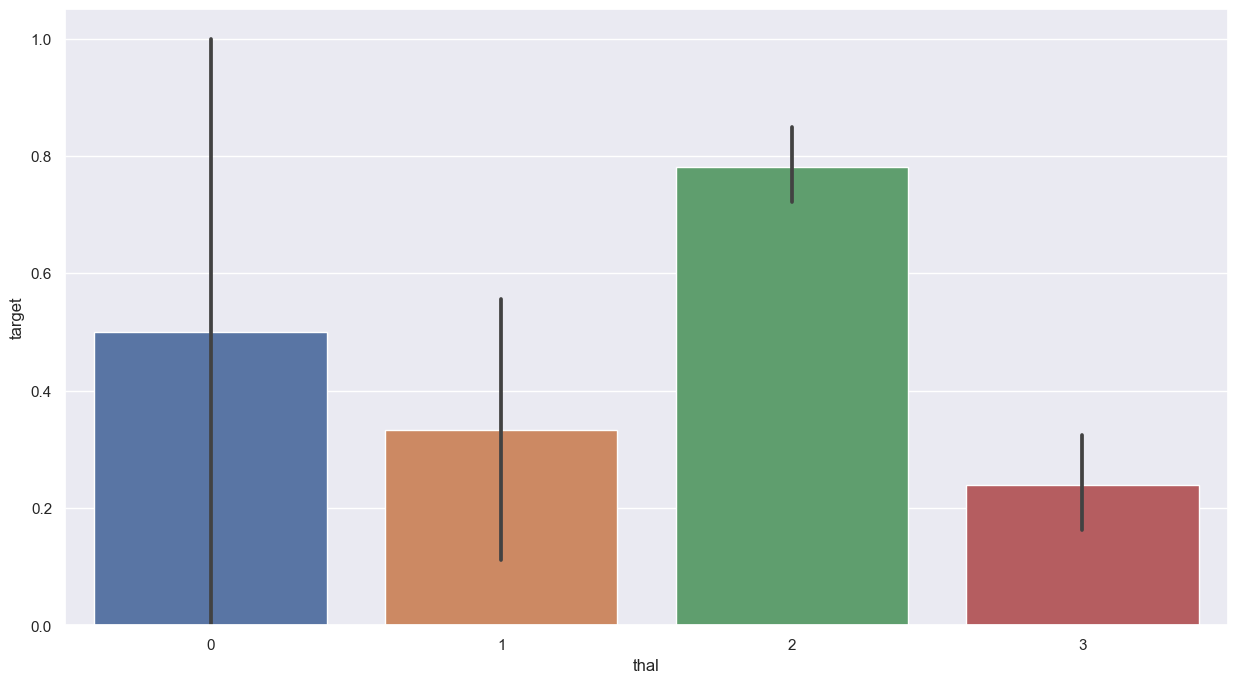

In [89]:
sns.barplot(x=data["thal"],y=data['target'])

# <f2>5. Data Pre Processing

In [90]:
#separting cateogorical and numerical columns differently so we can process them differently
cat_col=[]
num_col=[]

for columns in data.columns:
        if data[columns].nunique()<=10:
            cat_col.append(columns)
        else :
            num_col.append(columns)

In [91]:
cat_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [92]:
num_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<h3>5.1. Encoding Categorical Data

In [93]:
data['cp'].unique() 
# here the range for the chest pain(cp) ranges from from 0-4 
# due to this many ml models may consider it as numerical order when there is no order


array([3, 2, 1, 0], dtype=int64)

In [94]:
#these columns are removed as they are already in binary form 
cat_col.remove('sex')
cat_col.remove('target')

In [95]:
# so convert the numerical ranges into binary classification based on the unique no of values  which requires inserting lot of dummy values
# this may arise a new problem of dummy variable trap ie In simple words, it means value of one variable can be predicted from the values of other variable(s).
# which breaks the assumption of linear regression that observations should be independent of each other 
# To avoid dummy variable trap we should always add one less (n-1) dummy variable then the total number of categories present in the categorical data (n)

data=pd.get_dummies(data,columns=cat_col,drop_first=True) #dropping the first column of dummy variable (n-1)

In [96]:
data

age  sex  trestbps  chol  thalach  oldpeak  target   cp_1   cp_2   cp_3  \
0     63    1       145   233      150      2.3       1  False  False   True   
1     37    1       130   250      187      3.5       1  False   True  False   
2     41    0       130   204      172      1.4       1   True  False  False   
3     56    1       120   236      178      0.8       1   True  False  False   
4     57    0       120   354      163      0.6       1  False  False  False   
..   ...  ...       ...   ...      ...      ...     ...    ...    ...    ...   
298   57    0       140   241      123      0.2       0  False  False  False   
299   45    1       110   264      132      1.2       0  False  False   True   
300   68    1       144   193      141      3.4       0  False  False  False   
301   57    1       130   131      115      1.2       0  False  False  False   
302   57    0       130   236      174      0.0       0   True  False  False   

     ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  \
0    ...    False    False    False  False  False  False  False    True   
1    ...    False    False    False  False  False  False  False   False   
2    ...    False    False     True  False  False  False  False   False   
3    ...    False    False     True  False  False  False  False   False   
4    ...     True    False     True  False  False  False  False   False   
..   ...      ...      ...      ...    ...    ...    ...    ...     ...   
298  ...     True     True    False  False  False  False  False   False   
299  ...    False     True    False  False  False  False  False   False   
300  ...    False     True    False  False   True  False  False   False   
301  ...     True     True    False   True  False  False  False   False   
302  ...    False     True    False   True  False  False  False   False   

     thal_2  thal_3  
0     False   False  
1      True   False  
2      True   False  
3      True   False  
4      True   False  
..      ...     ...  
298   False    True  
299   False    True  
300   False    True  
301   False    True  
302    True   False  

[302 rows x 23 columns]

<h3>5.2. Feature Classification

In [97]:
data.head()

age  sex  trestbps  chol  thalach  oldpeak  target   cp_1   cp_2   cp_3  \
0   63    1       145   233      150      2.3       1  False  False   True   
1   37    1       130   250      187      3.5       1  False   True  False   
2   41    0       130   204      172      1.4       1   True  False  False   
3   56    1       120   236      178      0.8       1   True  False  False   
4   57    0       120   354      163      0.6       1  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  False  False   False    True   
4  ...     True    False     True  False  False  False  False   False    True   

   thal_3  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 23 columns]

In [98]:
# the range of age,trestbp,chol,thalach etc is very different so to normalize the range of independent data or features we are using feature scaling
# feature allows us to put feature in the same scale
# since we are using the linear algorithn (like regression ,svm,knearest neighbour)which requires calculating distance between two data we need to normalize all data  
# if not scaled then the features with larger values starts dominating while calculating distance

from sklearn.preprocessing import StandardScaler


In [99]:
st=StandardScaler();
data[num_col]=st.fit_transform(data[num_col]);
data.head()
#values in the same range

age  sex  trestbps      chol   thalach   oldpeak  target   cp_1  \
0  0.949794    1  0.764066 -0.261285  0.018826  1.084022       1  False   
1 -1.928548    1 -0.091401  0.067741  1.636979  2.118926       1  False   
2 -1.485726    0 -0.091401 -0.822564  0.980971  0.307844       1   True   
3  0.174856    1 -0.661712 -0.203222  1.243374 -0.209608       1   True   
4  0.285561    0 -0.661712  2.080602  0.587366 -0.382092       1  False   

    cp_2   cp_3  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0  False   True  ...    False    False    False  False  False  False  False   
1   True  False  ...    False    False    False  False  False  False  False   
2  False  False  ...    False    False     True  False  False  False  False   
3  False  False  ...    False    False     True  False  False  False  False   
4  False  False  ...     True    False     True  False  False  False  False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   False    True   False  
2   False    True   False  
3   False    True   False  
4   False    True   False  

[5 rows x 23 columns]

# <p2>6. Splitting The Dataset Into Training and Testing Set

In [100]:
# here dependent variable(Y) is the target value
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [101]:
#rest all is the independent variable except the target
x=data.drop('target',axis=1)
x

age  sex  trestbps      chol   thalach   oldpeak   cp_1   cp_2  \
0    0.949794    1  0.764066 -0.261285  0.018826  1.084022  False  False   
1   -1.928548    1 -0.091401  0.067741  1.636979  2.118926  False   True   
2   -1.485726    0 -0.091401 -0.822564  0.980971  0.307844   True  False   
3    0.174856    1 -0.661712 -0.203222  1.243374 -0.209608   True  False   
4    0.285561    0 -0.661712  2.080602  0.587366 -0.382092  False  False   
..        ...  ...       ...       ...       ...       ...    ...    ...   
298  0.285561    0  0.478910 -0.106449 -1.161988 -0.727060  False  False   
299 -1.042904    1 -1.232023  0.338703 -0.768384  0.135360  False  False   
300  1.503322    1  0.707035 -1.035462 -0.374779  2.032684  False  False   
301  0.285561    1 -0.091401 -2.235438 -1.511859  0.135360  False  False   
302  0.285561    0 -0.091401 -0.203222  1.068439 -0.899544   True  False   

      cp_3  fbs_1  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0     True   True  ...    False    False    False  False  False  False  False   
1    False  False  ...    False    False    False  False  False  False  False   
2    False  False  ...    False    False     True  False  False  False  False   
3    False  False  ...    False    False     True  False  False  False  False   
4    False  False  ...     True    False     True  False  False  False  False   
..     ...    ...  ...      ...      ...      ...    ...    ...    ...    ...   
298  False  False  ...     True     True    False  False  False  False  False   
299   True  False  ...    False     True    False  False  False  False  False   
300  False   True  ...    False     True    False  False   True  False  False   
301  False  False  ...     True     True    False   True  False  False  False   
302  False  False  ...    False     True    False   True  False  False  False   

     thal_1  thal_2  thal_3  
0      True   False   False  
1     False    True   False  
2     False    True   False  
3     False    True   False  
4     False    True   False  
..      ...     ...     ...  
298   False   False    True  
299   False   False    True  
300   False   False    True  
301   False   False    True  
302   False    True   False  

[302 rows x 22 columns]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=40)
#The random state hyperparameter in the train_test_split() function controls the shuffling process. 
#With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.

In [104]:
X_train

age  sex  trestbps      chol   thalach   oldpeak   cp_1   cp_2  \
69   0.839089    0 -0.433587 -0.725791  0.587366 -0.899544  False  False   
118 -0.932199    0 -1.517178 -0.822564  0.980971 -0.899544   True  False   
49  -0.157260    0  0.364848 -0.241930  0.456164 -0.899544  False  False   
16   0.396267    0 -0.661712  1.809640  0.980971 -0.899544  False   True   
54   0.949794    0  0.193755  0.106449  0.980971 -0.899544  False   True   
..        ...  ...       ...       ...       ...       ...    ...    ...   
269  0.174856    1 -0.091401  0.706437 -2.036666  0.480328  False  False   
194  0.617678    1  0.478910 -1.190298  0.237495  1.687716  False   True   
166  1.392616    1 -0.661712 -0.338703 -0.899585  1.342748  False  False   
7   -1.153610    1 -0.661712  0.319348  1.024705 -0.899544   True  False   
220  0.949794    0  1.049221  3.106387  0.193761  2.550136  False  False   

      cp_3  fbs_1  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
69   False  False  ...    False    False     True  False  False  False  False   
118  False  False  ...    False    False     True  False  False  False  False   
49   False  False  ...    False    False     True  False  False  False  False   
16   False  False  ...    False    False     True  False  False  False  False   
54   False  False  ...    False    False     True  False  False  False  False   
..     ...    ...  ...      ...      ...      ...    ...    ...    ...    ...   
269  False   True  ...     True    False    False  False  False  False  False   
194  False  False  ...    False     True    False  False  False  False  False   
166  False  False  ...     True     True    False  False   True  False  False   
7    False  False  ...    False    False     True  False  False  False  False   
220  False  False  ...    False     True    False  False  False   True  False   

     thal_1  thal_2  thal_3  
69    False    True   False  
118   False    True   False  
49    False    True   False  
16    False    True   False  
54    False    True   False  
..      ...     ...     ...  
269   False   False    True  
194   False    True   False  
166   False   False    True  
7     False   False    True  
220   False   False    True  

[241 rows x 22 columns]

In [105]:
Y_train

69     1
118    1
49     1
16     1
54     1
      ..
269    0
194    0
166    0
7      1
220    0
Name: target, Length: 241, dtype: int64

# <p2>7. Logistic Regression

In [106]:
# since target variable can be 0->no heart diease or 1->heart diease means our 'target' is categorical -> that is classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [107]:
log=LogisticRegression();
log.fit(X_train,Y_train) #training the model on the dataset

LogisticRegression()

In [108]:
# prediction from model on test data
y_pred1=log.predict(X_test)

In [109]:
#check the correctness with the Y test 
lr_score=accuracy_score(Y_test,y_pred1)
lr_score

0.9508196721311475

# <p2>8. SVM(Support Vector Machine)

In [110]:
from sklearn import svm

In [111]:
svm=svm.SVC()
svm.fit(X_train,Y_train)

SVC()

In [112]:
y_pred2=svm.predict(X_test)

In [113]:
svm_score=accuracy_score(Y_test,y_pred2)
svm_score

0.8852459016393442

# <p2>9. KNeighbors Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [116]:
y_pred3=knn.predict(X_test)

In [117]:
accuracy_score(Y_test,y_pred3)

0.8524590163934426

In [118]:
#since there can be different accuracy based on 'n' no of neighbours so caluculate the best of them

score=[]
max_accuracy=0
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    curr_accuracy=accuracy_score(Y_test,y_pred)
    score.append(curr_accuracy)
    if curr_accuracy > max_accuracy:
        max_accuracy=curr_accuracy
        best_x=k

knn=KNeighborsClassifier(n_neighbors=best_x)
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)
knn_score=accuracy_score(Y_test,y_pred3)
knn_score

0.9016393442622951

In [119]:
score

[0.7868852459016393,
 0.7704918032786885,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.819672131147541,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934]

# <p>10. Non-Linear Algorithm

In [120]:
#here there is no requirement of encoding and feature so we are taking the dataset once again
data=pd.read_csv("heart.csv")
data=data.drop_duplicates()
data.shape

(302, 14)

In [121]:
x=data.drop('target',axis=1)
x

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[302 rows x 13 columns]

In [122]:
y=data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# <p2>10.1. Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [126]:
y_pred4=dt.predict(X_test)

In [127]:
accuracy_score(Y_test,y_pred4)

0.7540983606557377

In [128]:

max_accuracy = 0
score=[]
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = accuracy_score(Y_pred_dt,Y_test)
    score.append(current_accuracy)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
y_pred4 = dt.predict(X_test)
dt_score=accuracy_score(Y_test,y_pred4)
dt_score

0.8032786885245902

# <p2>10.2. Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf=RandomForestClassifier();
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [131]:
y_pred5=rf.predict(X_test)

In [132]:
accuracy_score(Y_test,y_pred5)

0.9016393442622951

In [133]:
max_accuracy = 0

score=[]
for x in range(200):
    dt = RandomForestClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = accuracy_score(Y_pred_dt,Y_test)
    score.append(current_accuracy)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = RandomForestClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
y_pred5 = dt.predict(X_test)
rf_score=accuracy_score(Y_test,y_pred5)
rf_score
# best_x

0.9344262295081968

In [134]:
score

[0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.8688524590163934,
 0.9016393442622951,
 0.9016393442622951,
 0.9344262295081968,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8524590163934426,
 0.9016393442622951,
 0.9016393442622951,
 0.8688524590163934,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.9016393442622951,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.9016393442622951,
 0.8852459016393442,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8852459016393442,
 0.8524590163934426,
 0.8852459016393442,
 0.9180327868852459,
 0.8688524590163934,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016

<Axes: >

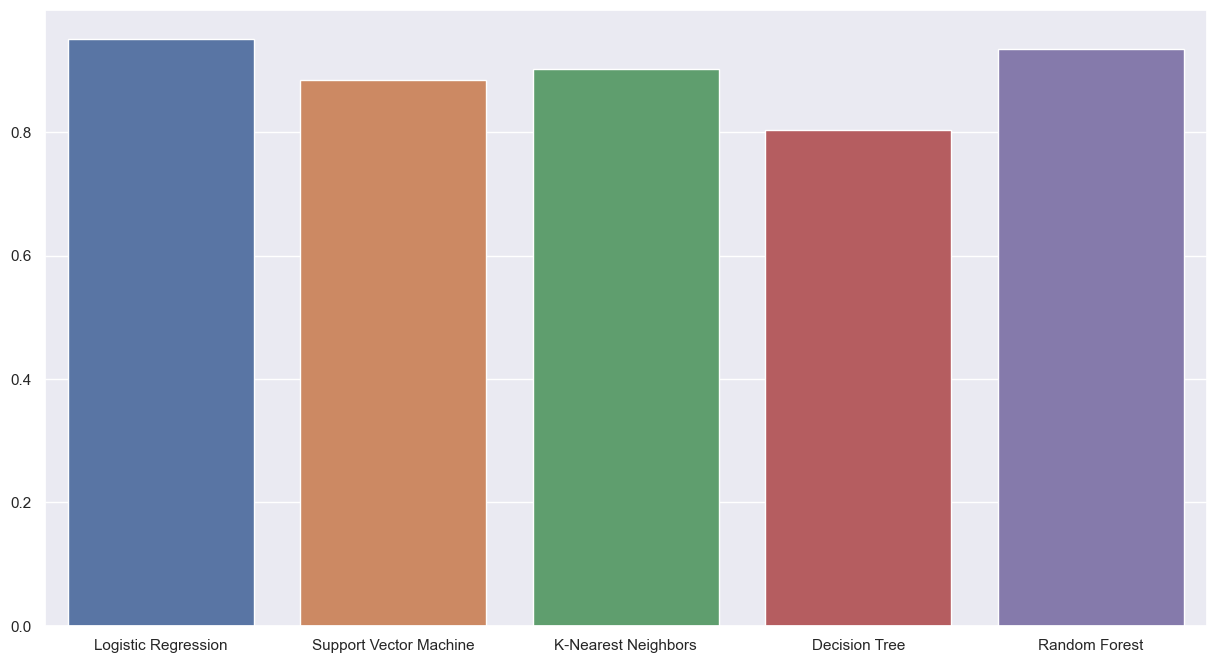

In [135]:
scores = [lr_score,svm_score,knn_score,dt_score,rf_score]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=algorithms,y=scores)

# <p2>11. Save the Model

In [138]:
#since logistic regression gives the maximum accuracy so use logistic regression during saving the model
import joblib
joblib.dump(log,'model_heart_diease')

['model_heart_diease']